## Visualize Gradient Descent

In [1]:
import numpy as np

# Generate data set
n = 100
xs = 2 * np.random.rand(n, 1)
ys = 4 + 3 * xs + np.random.randn(n, 1)

(array([ 209.,  225.,  190.,  204.,  204.,  192.,  202.,  193.,  220.,
         188.,  191.,  196.,  190.,  167.,  192.,  195.,  188.,  176.,
         229.,  210.,  203.,  213.,  187.,  203.,  217.,  230.,  176.,
         179.,  186.,  199.,  192.,  184.,  215.,  192.,  211.,  184.,
         201.,  231.,  188.,  220.,  200.,  188.,  205.,  202.,  210.,
         197.,  231.,  184.,  188.,  223.]),
 array([  9.21512259e-05,   2.00887239e-02,   4.00852966e-02,
          6.00818693e-02,   8.00784419e-02,   1.00075015e-01,
          1.20071587e-01,   1.40068160e-01,   1.60064733e-01,
          1.80061305e-01,   2.00057878e-01,   2.20054451e-01,
          2.40051023e-01,   2.60047596e-01,   2.80044169e-01,
          3.00040741e-01,   3.20037314e-01,   3.40033887e-01,
          3.60030459e-01,   3.80027032e-01,   4.00023605e-01,
          4.20020177e-01,   4.40016750e-01,   4.60013323e-01,
          4.80009895e-01,   5.00006468e-01,   5.20003041e-01,
          5.39999613e-01,   5.59996186e-01

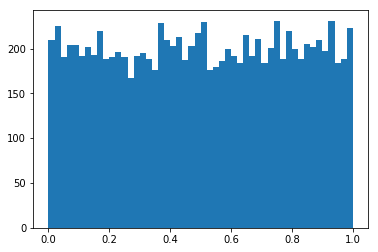

In [3]:
# Plot distributions of rand() and randn()
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(np.random.rand(10000), bins = 50)

In [4]:
# Implementation of the stochastic gradient descent algorithm

# hyper-parameters:
r_init = 0.1  # learning rate
threshold = 1e-6  # convergence threshold
maxiter = 5000  # maximun iteration

m, b = 0, 0  # initial choice of parameters
cost_history = np.zeros(maxiter+1)
m_history = np.zeros(maxiter + 1)
b_history = np.zeros(maxiter + 1)
# chose a data example at random
k = np.random.randint(n)
x, y = xs[k], ys[k]
print(k, x, y)
cost_history[0] = (m * x + b - y)**2 / n  # cost
i = 0  # iteration index

while (i < maxiter ):
    i += 1
    # chose a data example at random
    k = np.random.randint(n)
    x, y = xs[k], ys[k]
    # compute learning rate
    r = 1 / (r_init // n + 1)
    # compute the partial derivate with respect to m
    gradient_m = 2 * x * (m * x + b - y) / n
    # update m
    new_m = m - r * gradient_m
    # compute the partial derivative with respect to b
    gradient_b = 2 * (m * x + b - y) / n
    # update b
    new_b = b - r * gradient_b
    # update m, b, and cost
    m, b = new_m, new_b
    cost_history[i] = sum((m * xs + b - ys)**2) / n
    m_history[i] = m
    b_history[i] = b
    if i % 100 == 0:
        print('iteration:', i, 'cost:', cost_history[i], 'm, b:', m, b, r)
print('Gradient descent completed. m, b:', m, b)

3 [ 1.787173] [ 8.87189421]
iteration: 100 cost: 1.22047514513 m, b: [ 3.53216311] [ 3.17381587] 1.0
iteration: 200 cost: 1.19903793243 m, b: [ 3.66676234] [ 3.31185858] 1.0
iteration: 300 cost: 1.25042915417 m, b: [ 3.31395928] [ 3.30241894] 1.0
iteration: 400 cost: 1.16643420104 m, b: [ 3.42001481] [ 3.42621826] 1.0
iteration: 500 cost: 1.19215521748 m, b: [ 3.37705844] [ 3.36180861] 1.0
iteration: 600 cost: 1.17759756575 m, b: [ 3.42452593] [ 3.36924888] 1.0
iteration: 700 cost: 1.25452991341 m, b: [ 3.21454481] [ 3.40046141] 1.0
iteration: 800 cost: 1.16777428725 m, b: [ 3.3593124] [ 3.65992745] 1.0
iteration: 900 cost: 1.16123667719 m, b: [ 3.38303128] [ 3.58873957] 1.0
iteration: 1000 cost: 1.20561580014 m, b: [ 3.52200926] [ 3.59291293] 1.0
iteration: 1100 cost: 1.19143958099 m, b: [ 3.45480445] [ 3.63853357] 1.0
iteration: 1200 cost: 1.16124740468 m, b: [ 3.40696399] [ 3.55455243] 1.0
iteration: 1300 cost: 1.15878919621 m, b: [ 3.37175048] [ 3.56819699] 1.0
iteration: 1400 cost

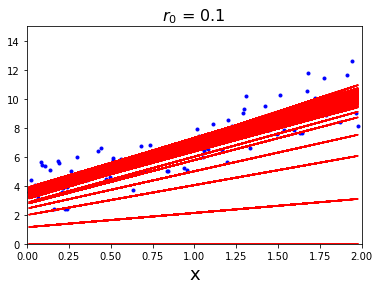

In [5]:
import matplotlib.pyplot as plt
# plot the data set
plt.plot(xs, ys, 'b.')

plt.xlabel('x', fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'$r_0$ = {}'.format(r_init), fontsize=16)

# Plot lines using m's and b's from m_history and b_history
for i in range(maxiter):
    if i % 10 == 0:
        m = m_history[i]
        b = b_history[i]
        ys_predict = m * xs + b
        plt.plot(xs, ys_predict, 'r-')
plt.savefig('SGD_plot')

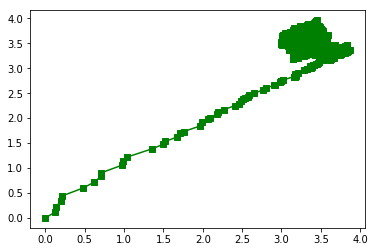

In [6]:
# plot the change of m and b on the parameter plain
plt.plot(m_history, b_history, 'g-s')

## Multilinear Regression
**Model**:

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n$
1. $\hat{y}$ is the predicted value.
2. $n$ is the number of features.
3. $x_i$ is the i-th feature value.
4. $\theta_j$ is the j-th model parameter (associated with $x_j$).

**Vectorized form**:

**$\hat{y} = \textbf{x}\cdot\theta^T$**.
1. $\theta = (\theta_0, \theta_1, ..., \theta_n)$ is the paramter vector.
2. $\textbf{x} = (x_0, x_1, ..., x_n)$ is the feature vector, where $x_0$ always equal to 1.

**MSE (mean square error) Cost function**:

$J = \frac{1}{m}\sum_{i=1}^{m}\big(\textbf{x}^{(i)}\cdot\theta^T - y^{(i)}\big)^2 = \|\textbf{X}\cdot\theta^T  - \textbf{y}\|^2 $

1. $(\textbf{x}^{(i)}, y^{(i)})$ represents the i-th training example
2. $\textbf{X}$ is an $m\times n$ matrix whose i-th row is $\textbf{x}^{(i)}$.
3. $\textbf{y} = (y^{(0)}, ..., y^{(m)})^T$.
4. $\|\cdot\|$ is the Euclid (L2) norm of a vector:

$\|(a_1, a_2,..., a_n)\| = \sqrt{a_1^2 + a_2^2 + \cdots + a_n^2}$.

**Normal Equation**
The value of $\theta$ that minimizes the cost function is:

$\hat{\theta} = \big(\textbf{X}^T\cdot\textbf{X}\big)\cdot\textbf{X}^T\cdot\textbf{y}$.

## Polynomial Regression


In [7]:
# random seed
np.random.seed(42)

# Generate training data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

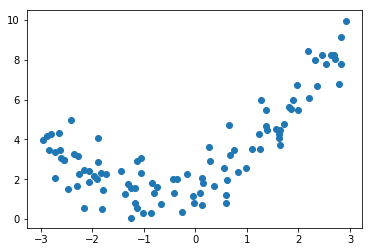

In [10]:
# Plot training data
plt.scatter(X,y)

## Polynomial Regression

**Model**:

$\hat{y} = \theta_0 + \theta_1x^1 + \theta_2x^2 +\cdots + \theta_nx^n$
1. $\hat{y}$ is the predicted value.
2. $n$ is the **degree of the polynomial**.
3. $x^i$ is the **i-th power of the feature**.
4. $\theta_j$ is the j-th model parameter (associated with $x^j$).

**Vectorized form**:

**$\hat{y} = \textbf{x}\cdot\theta^T$**.
1. $\theta = (\theta_0, \theta_1, ..., \theta_n)$ is the paramter vector.
2. $\textbf{x} = (x^0, x^1, ..., x^n)$ is the **feature vector**, where $x^0$ always equal to 1.

**MSE (mean square error) Cost function**:

$J = \frac{1}{m}\sum_{i=1}^{m}\big(\textbf{x}^{(i)}\cdot\theta^T - y^{(i)}\big)^2 = \|\textbf{X}\cdot\theta^T  - \textbf{y}\|^2 $

1. $(\textbf{x}^{(i)}, y^{(i)})$ represents the i-th training example
2. $\textbf{X}$ is an $m\times n$ matrix whose i-th row is $\textbf{x}^{(i)}$.
3. $\textbf{y} = (y^{(0)}, ..., y^{(m)})^T$.
4. $\|\cdot\|$ is the Euclid (L2) norm of a vector:

$\|(a_1, a_2,..., a_n)\| = \sqrt{a_1^2 + a_2^2 + \cdots + a_n^2}$.

**Normal Equation**
The value of $\theta$ that minimizes the cost function is:

$\hat{\theta} = \big(\textbf{X}^T\cdot\textbf{X}\big)^{-1}\cdot\textbf{X}^T\cdot\textbf{y}$.

In [11]:
# Perform polynomial regression with sklearn

# Add powers to the training data
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print('X[0]:', X[0])
print('X_poly[0]:', X_poly[0])


X[0]: [-0.75275929]
X_poly[0]: [-0.75275929  0.56664654]


In [14]:
from sklearn.linear_model import LinearRegression
# Solve polynomial regression with LinearRegression module
pm = LinearRegression()
pm.fit(X_poly, y)
print('y-intercept:', pm.intercept_)
print('coefficient for linear term:', pm.coef_[0, 0])
print('coefficient for quadratic term:', pm.coef_[0, 1])

y-intercept: [ 1.78134581]
coefficient for linear term: 0.933668932254
coefficient for quadratic term: 0.564562633617


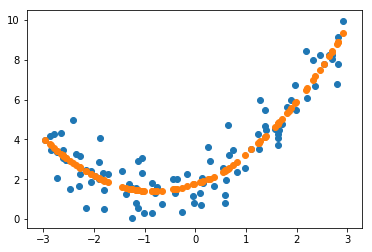

In [19]:
# plot the regression curve with data points
plt.scatter(X,y)
X_sort = np.sort(X_poly)
y_predict = pm.predict(X_sort)
plt.scatter(X, y_predict)

### Homework: due Wednesday, Feb 21
1. Complete iPython notebook 02/13 and 02/15
2. Apply normal equation to the above polynomial regression task
3. (for graduate students only) Apply Gradient Descent to the above polynomial regression task

In [7]:
# 2:

import numpy as np

n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(n, 1)

xs = np.array([X]) # input
ys = np.array([y]) # output

#xs = np.arange(1, 6, 1)

# print('xs:', xs)
# print('ys:', ys)
# print('n:', n)

# A = (np.sum(xs**2))/n
# B = (np.sum(2*xs))/n
# C = 1
# D = -(np.sum(2*xs*ys))/n
# E = -(np.sum(2*ys))/n
# F = (np.sum(ys**2))/n

# U = [[2*A,B], [B, 2*C]]
# v = [[-D],[-E]]
# z = np.linalg.solve(U, v)
# print('(m, b):', z)

xs2 = xs.reshape([n,1])
ys2 = ys.reshape([n,1])

X = np.concatenate([xs2**2, xs2, np.ones([100,1])], axis=1)
print(X)

z = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(ys2)

print('Results from applying normal equation:')
print('quadratic coeff:', z[0])
print('linear coeff:', z[1])
print('constant:', z[2])

[[  1.49056864e-01   3.86078831e-01   1.00000000e+00]
 [  7.54717070e+00   2.74721144e+00   1.00000000e+00]
 [  5.53485234e+00   2.35262669e+00   1.00000000e+00]
 [  6.75618639e+00   2.59926651e+00   1.00000000e+00]
 [  8.41871964e+00   2.90150300e+00   1.00000000e+00]
 [  3.58182205e+00  -1.89257022e+00   1.00000000e+00]
 [  2.85104683e-01  -5.33951948e-01   1.00000000e+00]
 [  7.56472057e+00   2.75040371e+00   1.00000000e+00]
 [  4.09926376e+00   2.02466386e+00   1.00000000e+00]
 [  2.26682735e+00  -1.50559867e+00   1.00000000e+00]
 [  7.57008948e+00   2.75137956e+00   1.00000000e+00]
 [  3.60336447e+00  -1.89825301e+00   1.00000000e+00]
 [  6.12871748e+00   2.47562467e+00   1.00000000e+00]
 [  5.94631087e+00   2.43850587e+00   1.00000000e+00]
 [  3.89100901e+00   1.97256407e+00   1.00000000e+00]
 [  4.29060460e+00  -2.07137746e+00   1.00000000e+00]
 [  2.52912019e+00  -1.59032078e+00   1.00000000e+00]
 [  8.72902701e+00  -2.95449268e+00   1.00000000e+00]
 [  5.19168755e-01  -7.20533